# Statistical Data Visualization with Seaborn

Seaborn is a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

## Setup and Data Loading

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load example datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")

print("Available datasets:")
print(f"Tips: {tips.shape} - Restaurant tipping data")
print(f"Iris: {iris.shape} - Flower measurements")
print(f"Titanic: {titanic.shape} - Passenger survival data")
print("\nTips dataset preview:")
print(tips.head())

Available datasets:
Tips: (244, 7) - Restaurant tipping data
Iris: (150, 5) - Flower measurements
Titanic: (891, 15) - Passenger survival data

Tips dataset preview:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Distribution Plots

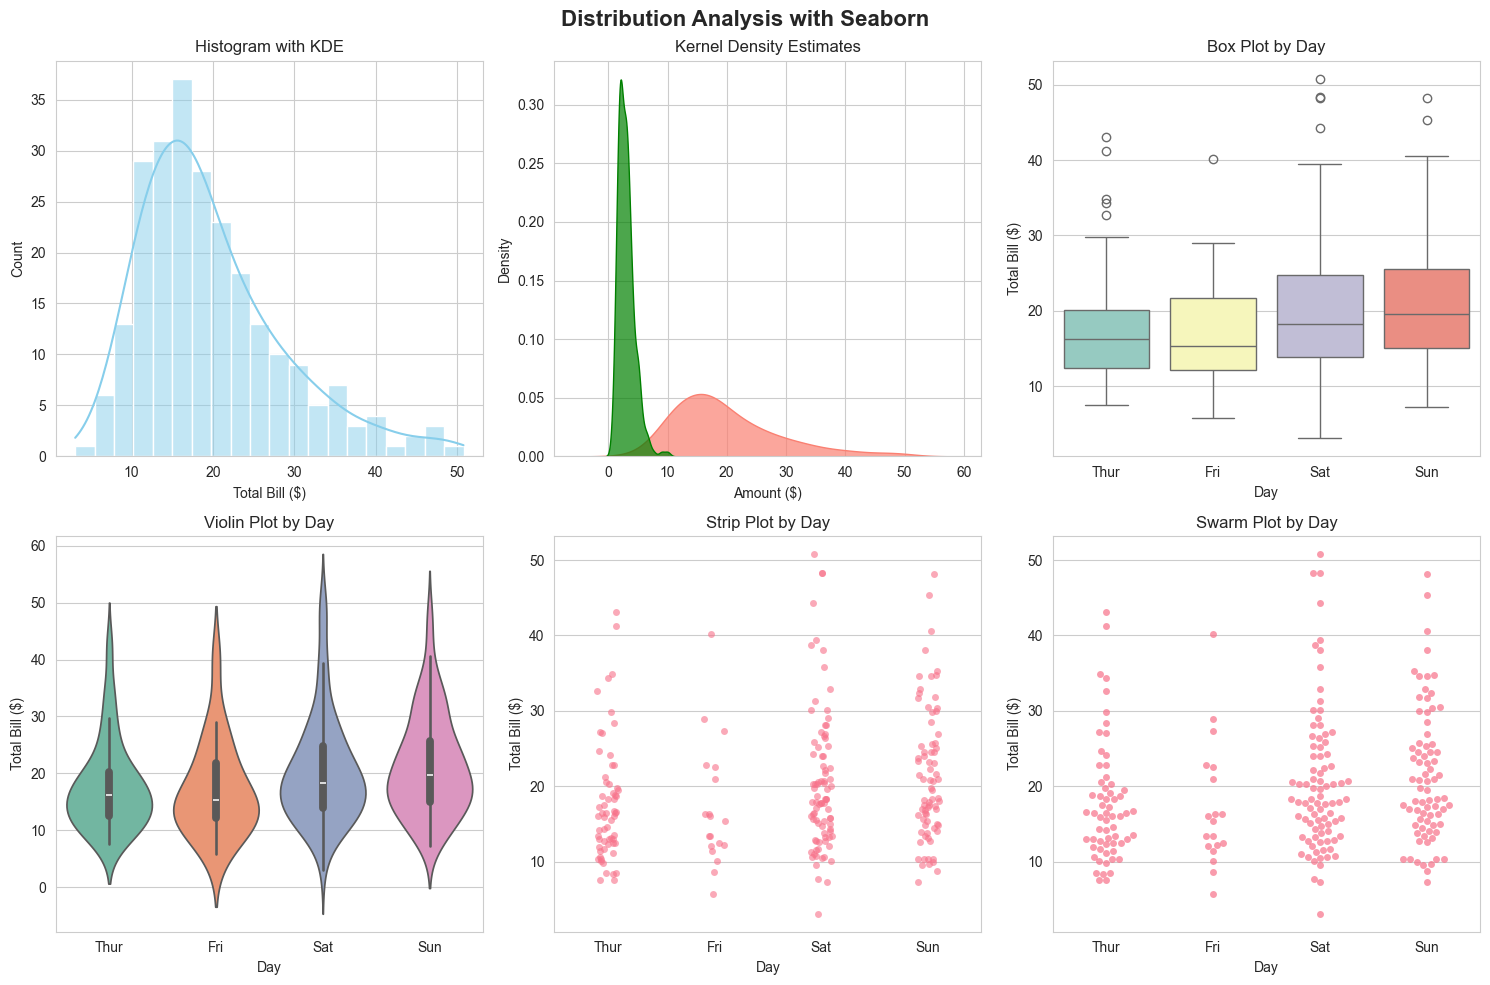

In [12]:
# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Analysis with Seaborn', fontsize=16, fontweight='bold')

# 1. Histogram with KDE
plt.subplot(2, 3, 1)
sns.histplot(data=tips, x='total_bill', kde=True, bins=20, color='skyblue')
plt.title('Histogram with KDE')
plt.xlabel('Total Bill ($)')
plt.ylabel('Count')

# 2. Kernel Density Estimate
plt.subplot(2, 3, 2)
sns.kdeplot(data=tips, x='total_bill', fill=True, color='salmon', alpha=0.7)
sns.kdeplot(data=tips, x='tip', fill=True, color='green', alpha=0.7)
plt.title('Kernel Density Estimates')
plt.xlabel('Amount ($)')

# 3. Box Plot
plt.subplot(2, 3, 3)
sns.boxplot(data=tips, x='day', y='total_bill', hue='day', palette='Set3', legend=False)
plt.title('Box Plot by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

# 4. Violin Plot
plt.subplot(2, 3, 4)
sns.violinplot(data=tips, x='day', y='total_bill', hue='day', palette='Set2', legend=False)
plt.title('Violin Plot by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

# 5. Strip Plot
plt.subplot(2, 3, 5)
sns.stripplot(data=tips, x='day', y='total_bill', alpha=0.6, jitter=True)
plt.title('Strip Plot by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

# 6. Swarm Plot
plt.subplot(2, 3, 6)
sns.swarmplot(data=tips, x='day', y='total_bill', alpha=0.7)
plt.title('Swarm Plot by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

## Relationship Plots

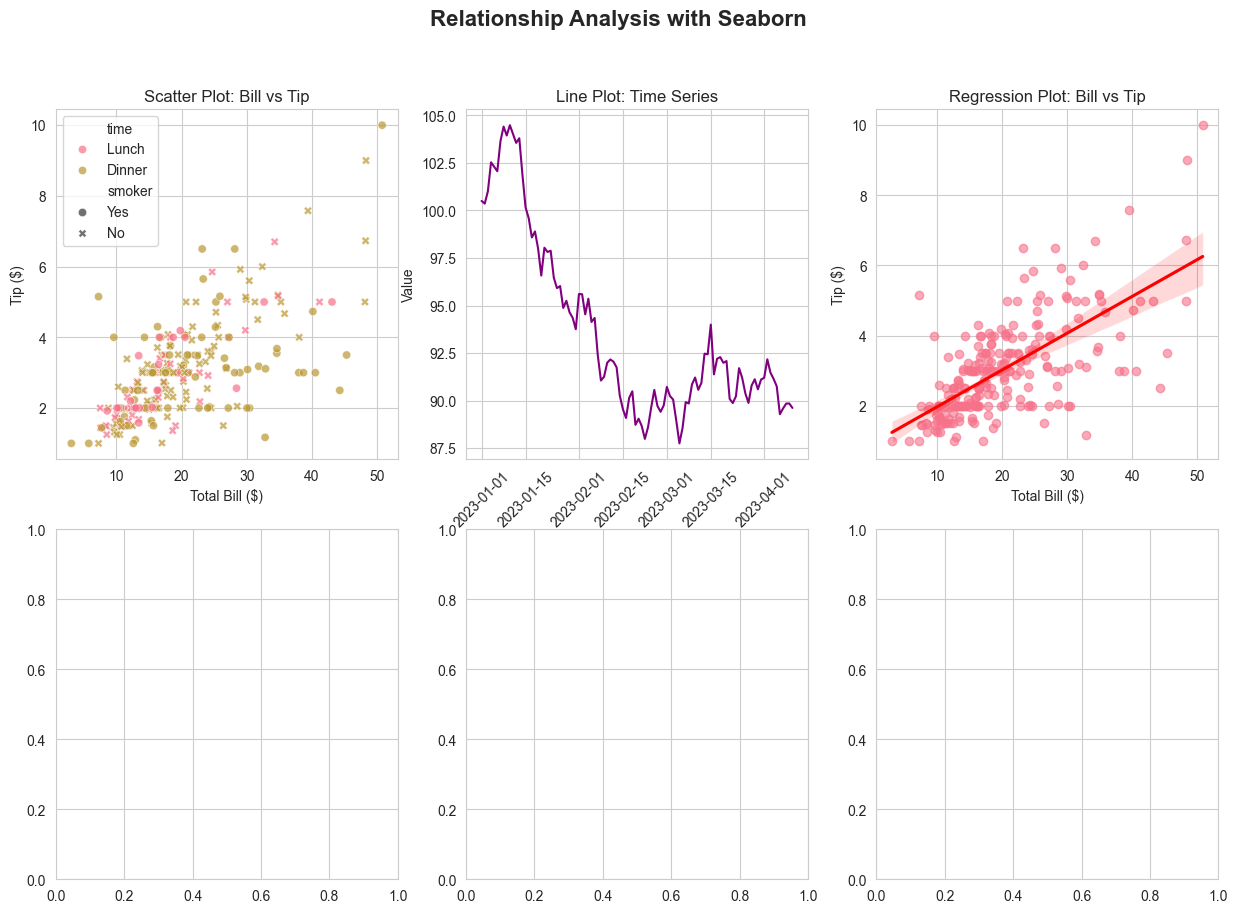

<Figure size 800x600 with 0 Axes>

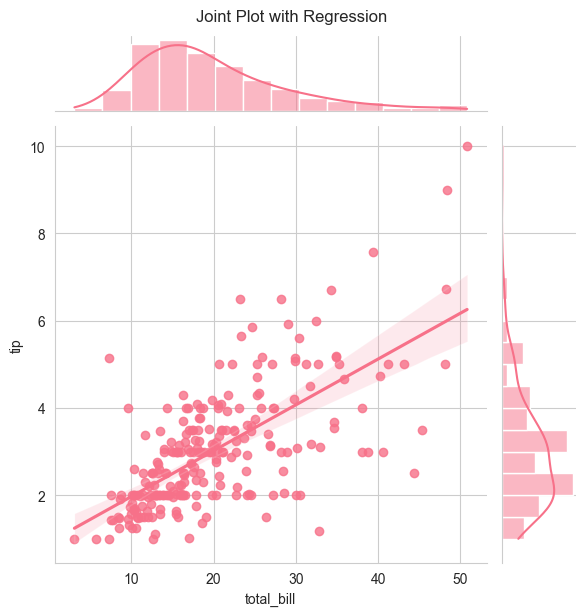

<Figure size 1000x800 with 0 Axes>

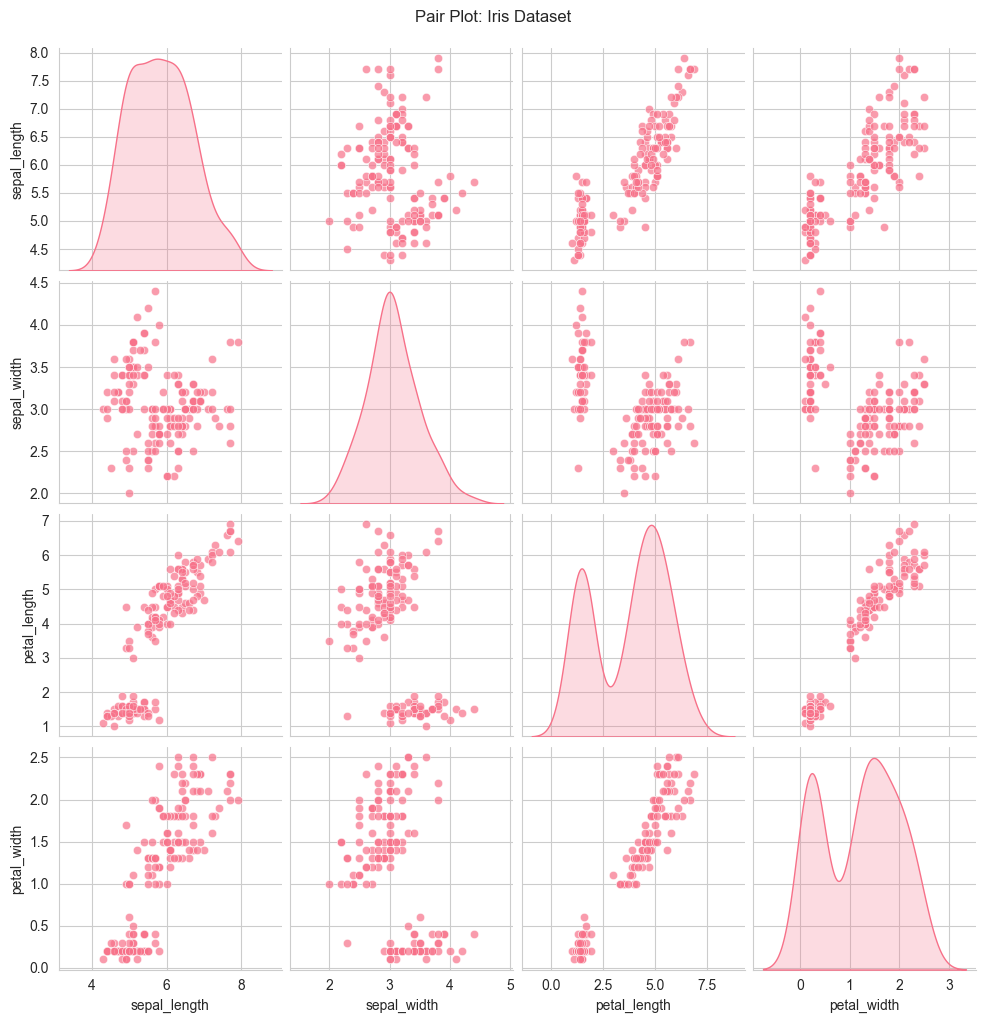

In [13]:
# Create subplots for relationship analysis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relationship Analysis with Seaborn', fontsize=16, fontweight='bold')

# 1. Scatter Plot
plt.subplot(2, 3, 1)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='smoker', alpha=0.7)
plt.title('Scatter Plot: Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

# 2. Line Plot
plt.subplot(2, 3, 2)
# Create sample time series data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100, freq='D')
values = np.cumsum(np.random.randn(100)) + 100
ts_data = pd.DataFrame({'date': dates, 'value': values})
sns.lineplot(data=ts_data, x='date', y='value', color='purple')
plt.title('Line Plot: Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)

# 3. Regression Plot
plt.subplot(2, 3, 3)
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression Plot: Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

# 4. Joint Plot (separate figure)
plt.figure(figsize=(8, 6))
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', height=6)
plt.suptitle('Joint Plot with Regression', y=1.02)
plt.show()

# 5. Pair Plot
plt.figure(figsize=(10, 8))
iris_subset = iris.drop('species', axis=1)
sns.pairplot(iris_subset, diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot: Iris Dataset', y=1.02)
plt.show()

## Categorical Plots

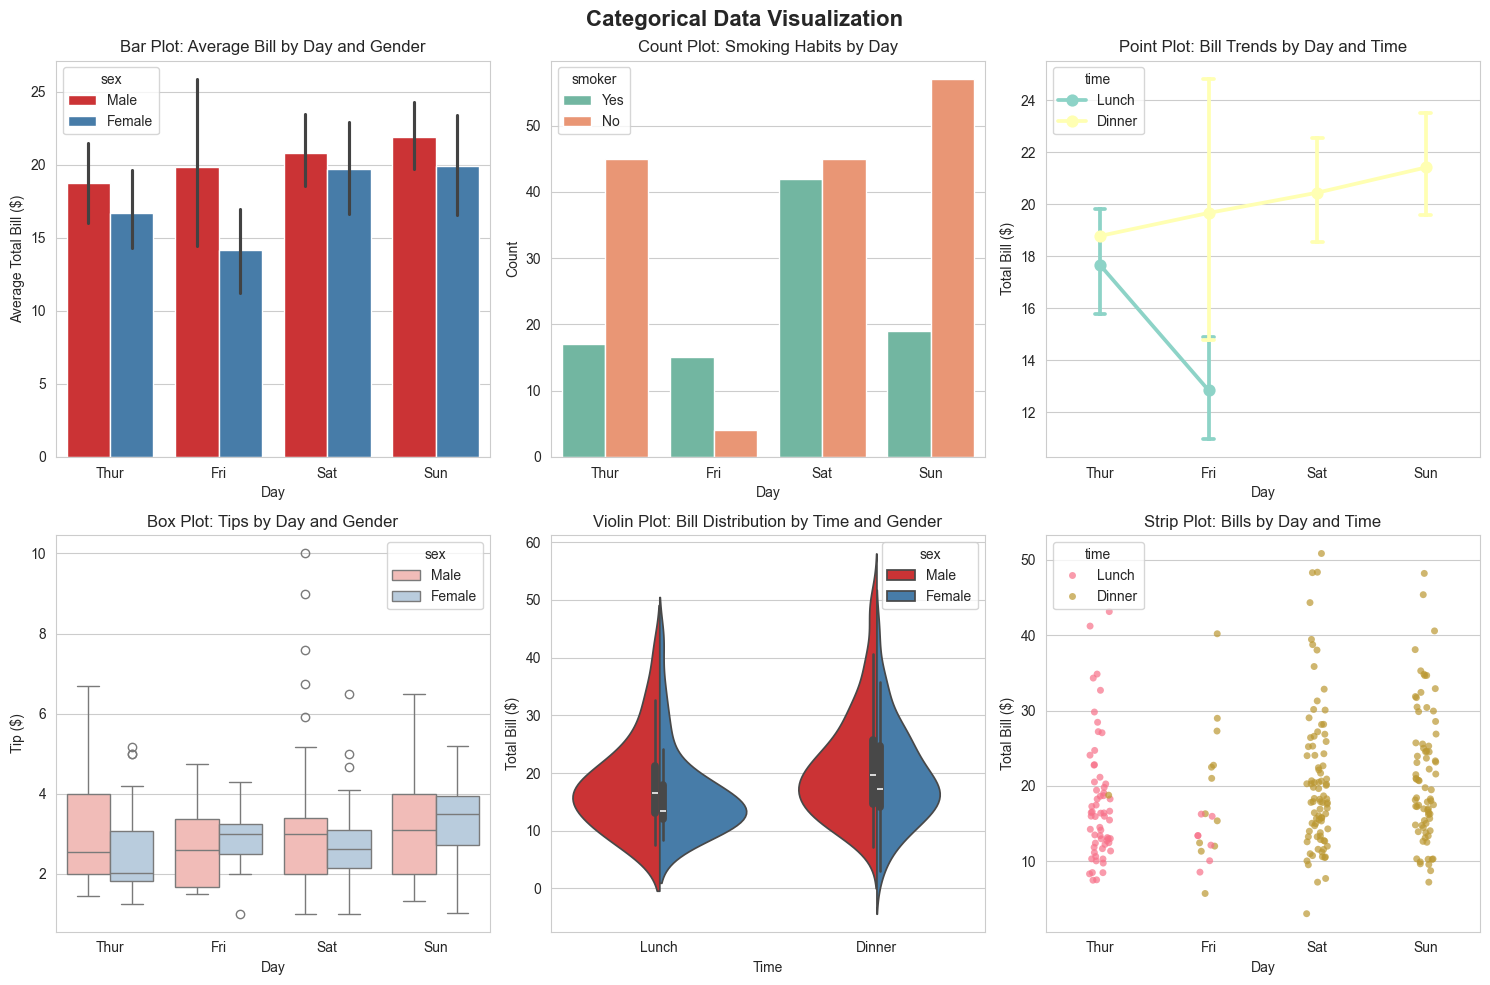

In [14]:
# Categorical data visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Categorical Data Visualization', fontsize=16, fontweight='bold')

# 1. Bar Plot
plt.subplot(2, 3, 1)
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set1')
plt.title('Bar Plot: Average Bill by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Average Total Bill ($)')

# 2. Count Plot
plt.subplot(2, 3, 2)
sns.countplot(data=tips, x='day', hue='smoker', palette='Set2')
plt.title('Count Plot: Smoking Habits by Day')
plt.xlabel('Day')
plt.ylabel('Count')

# 3. Point Plot
plt.subplot(2, 3, 3)
sns.pointplot(data=tips, x='day', y='total_bill', hue='time', palette='Set3', capsize=0.1)
plt.title('Point Plot: Bill Trends by Day and Time')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

# 4. Box Plot with Hue
plt.subplot(2, 3, 4)
sns.boxplot(data=tips, x='day', y='tip', hue='sex', palette='Pastel1')
plt.title('Box Plot: Tips by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Tip ($)')

# 5. Violin Plot with Hue
plt.subplot(2, 3, 5)
sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True, palette='Set1')
plt.title('Violin Plot: Bill Distribution by Time and Gender')
plt.xlabel('Time')
plt.ylabel('Total Bill ($)')

# 6. Strip Plot with Hue
plt.subplot(2, 3, 6)
sns.stripplot(data=tips, x='day', y='total_bill', hue='time', alpha=0.7, jitter=True)
plt.title('Strip Plot: Bills by Day and Time')
plt.xlabel('Day')
plt.ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

## Matrix Plots

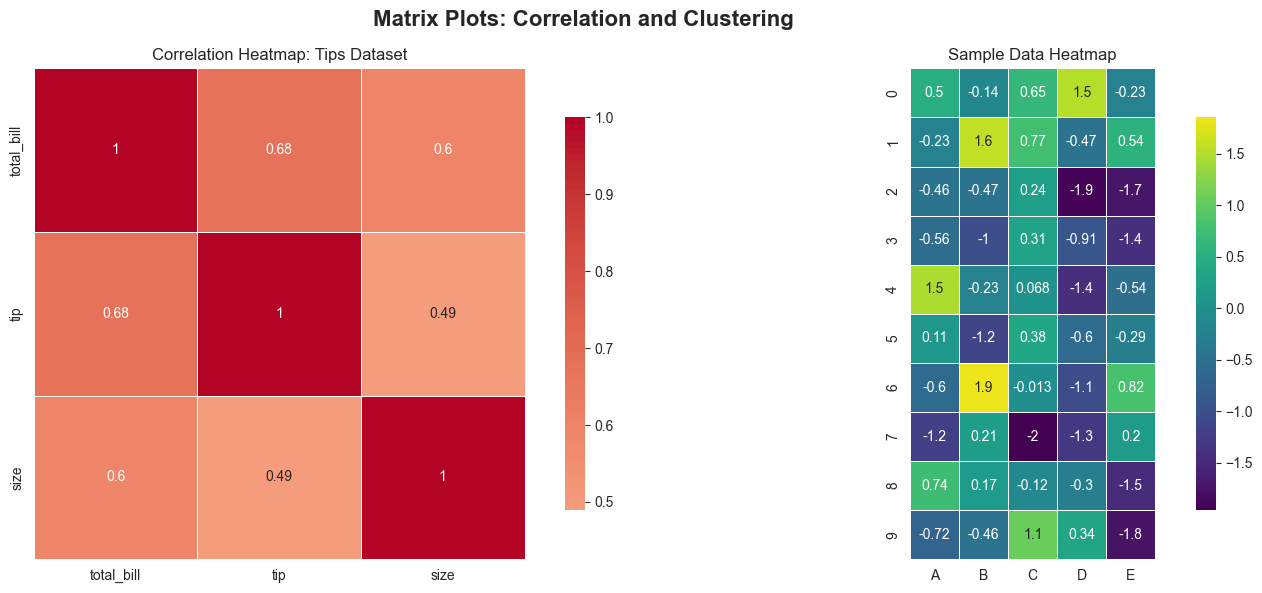

<Figure size 800x600 with 0 Axes>

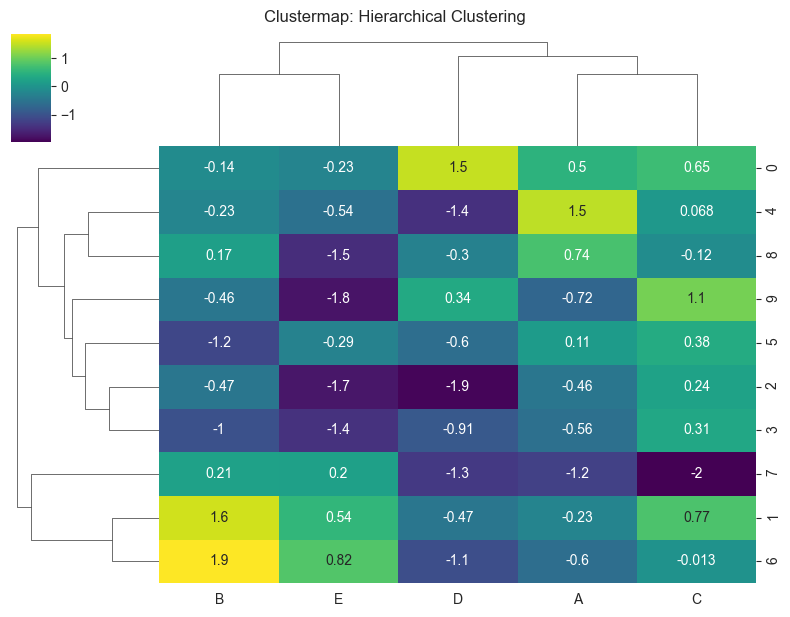

In [15]:
# Matrix plots for correlation and clustering analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrix Plots: Correlation and Clustering', fontsize=16, fontweight='bold')

# 1. Correlation Heatmap
plt.subplot(1, 2, 1)
# Calculate correlation matrix for numeric columns
numeric_cols = ['total_bill', 'tip', 'size']
correlation_matrix = tips[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap: Tips Dataset')

# 2. Create sample data for clustermap
plt.subplot(1, 2, 2)
np.random.seed(42)
sample_data = np.random.randn(10, 5)
sample_df = pd.DataFrame(sample_data, columns=['A', 'B', 'C', 'D', 'E'])
sns.heatmap(sample_df, annot=True, cmap='viridis', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Sample Data Heatmap')

plt.tight_layout()
plt.show()

# Clustermap (separate figure)
plt.figure(figsize=(8, 6))
sns.clustermap(sample_df, annot=True, cmap='viridis', figsize=(8, 6))
plt.suptitle('Clustermap: Hierarchical Clustering', y=1.02)
plt.show()

## Seaborn Summary

**Key Features:**
- High-level interface for statistical graphics
- Built on matplotlib with better defaults
- Automatic handling of complex statistical plots
- Integration with pandas DataFrames
- Beautiful default color palettes and themes
- Support for complex multi-plot grids

**Main Plot Types:**
- **Distribution plots**: `histplot()`, `kdeplot()`, `boxplot()`, `violinplot()`
- **Relationship plots**: `scatterplot()`, `lineplot()`, `regplot()`, `jointplot()`, `pairplot()`
- **Categorical plots**: `barplot()`, `countplot()`, `pointplot()`, `stripplot()`, `swarmplot()`
- **Matrix plots**: `heatmap()`, `clustermap()`

**Best Practices:**
- Use `sns.set_style()` and `sns.set_palette()` for consistent styling
- Leverage built-in datasets with `sns.load_dataset()`
- Use `hue` parameter for grouping/categorical variables
- Combine with matplotlib for fine-tuning
- Use `plt.suptitle()` and `plt.tight_layout()` for multi-plot figures

**Advantages over Matplotlib:**
- Less code for complex statistical plots
- Automatic statistical computations
- Better color palettes and themes
- Easier handling of categorical data
- Built-in support for DataFrame operations

Next: Scikit-learn for Machine Learning